In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [2]:
df.describe(include='all')

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.000000,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,NaN,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN
mean,38.683453,NaN,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,NaN,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,NaN,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,NaN,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,NaN,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,NaN,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,4.000000,2.000000,28.560000


In [3]:
# Enhanced preprocessing script for the gym members dataset

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')  # Load the raw dataset

# Check for missing values
missing_values = df.isnull().sum()  # Count missing values in each column

# Handle missing values
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns 
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns 

# Fill missing numeric values with median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median()) 
# Fill missing categorical values with mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0]) 


# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)  # One-hot encode categorical features

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 
                      'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 
                      'Workout_Frequency (days/week)', 'BMI']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])  # Scale numerical features

# Feature Engineering
df_encoded['Heart_Rate_Zone'] = pd.cut(df['Max_BPM'], bins=[0, 120, 160, 200], labels=['Fat-Burning', 'Cardio', 'Peak'])  # Add heart rate zone feature
df_encoded['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 50], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])  # Add BMI category feature
df_encoded['Activity_Score'] = df['Workout_Frequency (days/week)'] * df['Session_Duration (hours)']  # Add activity score

# Encode new categorical features
df_encoded = pd.get_dummies(df_encoded, columns=['Heart_Rate_Zone', 'BMI_Category'], drop_first=True)  # Encode new categorical features

# Save the enhanced processed dataset
processed_file_path = 'enhanced_processed_gym_data.csv'  # Filepath for the processed dataset
df_encoded.to_csv(processed_file_path, index=False)  # Save the processed dataset to a CSV file

# Display a sample of the processed data
#from tabulate import tabulate
#print(tabulate(df_encoded.head(), headers='keys', tablefmt='psql'))# Display the first few rows for verification

df_encoded.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Activity_Score,Heart_Rate_Zone_Cardio,Heart_Rate_Zone_Peak,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,...,True,False,False,True,6.76,False,True,False,False,True
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,...,False,True,False,False,5.20,False,True,False,False,True
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,...,False,False,False,False,4.44,False,True,True,False,False
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,...,True,False,True,False,1.77,False,True,False,False,False
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,...,True,False,True,False,1.92,False,True,False,False,False


In [4]:
# Universal Variables
f1Scores = []

In [5]:
# Cardiovascular Risk Classification (Random Forest): Predict if a member's max BPM during exercise exceeds safe limits for their age. (Josue)
# Josue's Code: adding a column to see whether or not max bpm was achieved for the age
df_encoded['Exceeds_Safe_Limit'] = (df['Max_BPM'] > (220 - df['Age'])).astype(int)

target = df_encoded['Exceeds_Safe_Limit']
data = df_encoded.drop('Exceeds_Safe_Limit', axis=1)
df_encoded.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Activity_Score,Heart_Rate_Zone_Cardio,Heart_Rate_Zone_Peak,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese,Exceeds_Safe_Limit
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,...,False,False,True,6.76,False,True,False,False,True,1
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,...,True,False,False,5.20,False,True,False,False,True,1
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,...,False,False,False,4.44,False,True,True,False,False,0
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,...,False,True,False,1.77,False,True,False,False,False,0
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,...,False,True,False,1.92,False,True,False,False,False,1


In [6]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(data, target, train_size=.8)

Accuracy: 0.9128205128205128
Precision: 0.9191907501137233
Recall Score: 0.9128205128205128
F1 Score: 0.911709673973825
Confusion Matrix:
 [[107   2]
 [ 15  71]]


Text(0.5, 58.7222222222222, 'Predcited')

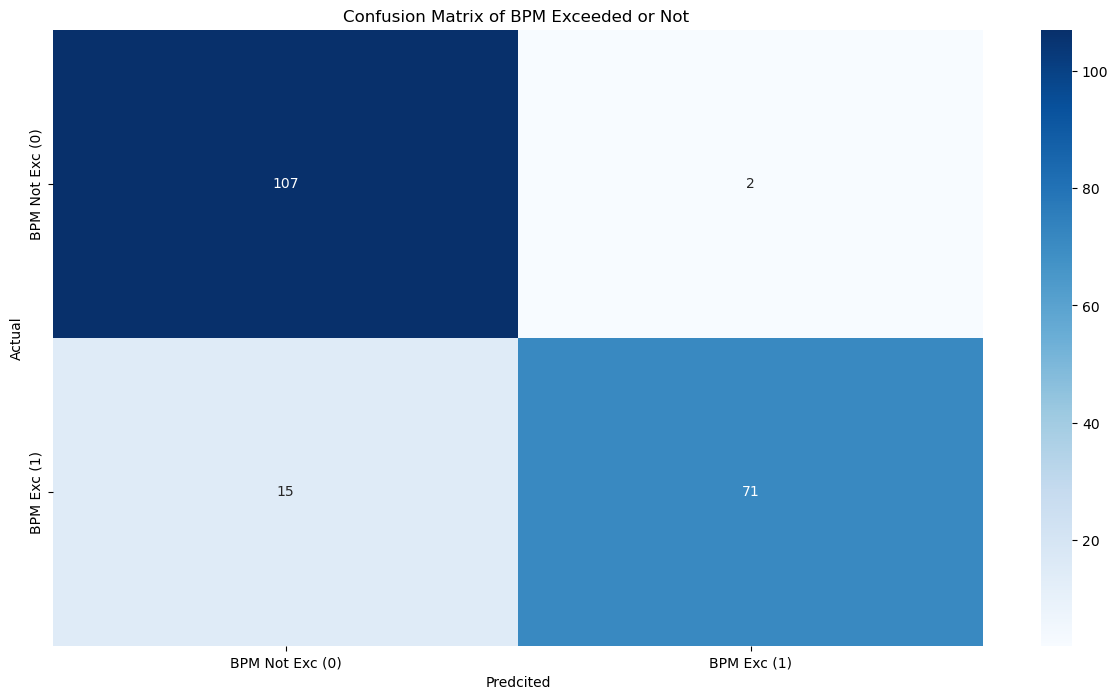

In [7]:
randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
randomForestClassifier.fit(X_train, Y_train)
Y_predictions = randomForestClassifier.predict(X_test)

acc = accuracy_score(Y_test, Y_predictions)
precision = precision_score(Y_test, Y_predictions, average='weighted')
recall = recall_score(Y_test, Y_predictions, average='weighted')
f1 = f1_score(Y_test, Y_predictions, average='weighted')
f1Scores.append(f1)
con_matrix = confusion_matrix(Y_test, Y_predictions)

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n {con_matrix}")
plt.figure(figsize=(15,8))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Blues', 
            xticklabels=['BPM Not Exc (0)', 'BPM Exc (1)'], 
            yticklabels=['BPM Not Exc (0)', 'BPM Exc (1)'])
plt.title('Confusion Matrix of BPM Exceeded or Not ')
plt.ylabel('Actual')
plt.xlabel('Predcited')

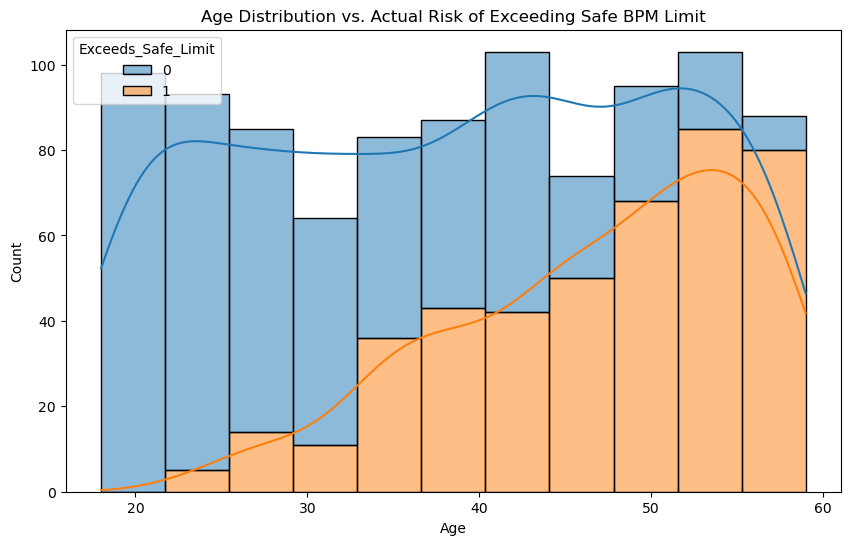

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded, x=df['Age'], hue='Exceeds_Safe_Limit', multiple='stack', kde=True)
plt.title('Age Distribution vs. Actual Risk of Exceeding Safe BPM Limit')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [9]:
# This histogram tells us that usually the max BPM being exceesive is when reaching older ages.

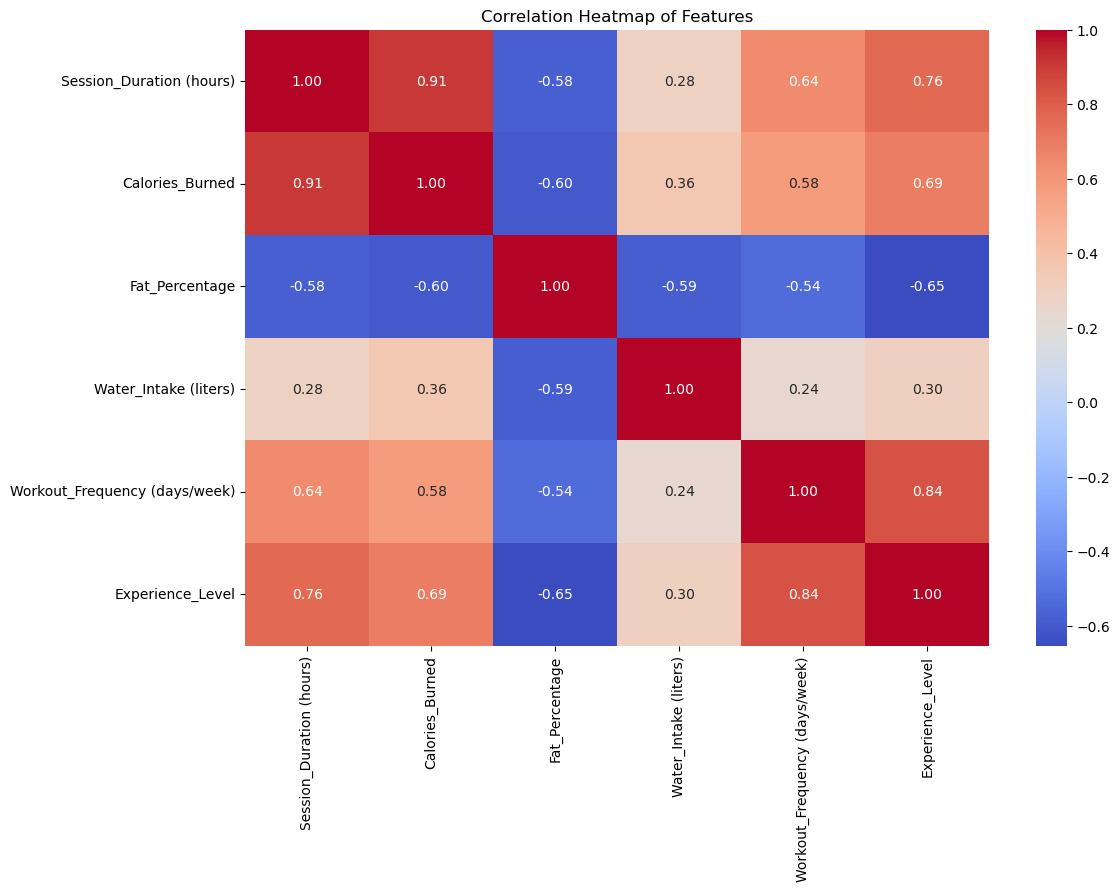

In [10]:
plt.figure(figsize=(12, 8))

selected_features = ['Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level']
corr_matrix = df_encoded[selected_features].corr()
#corr_matrix = df_encoded.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()